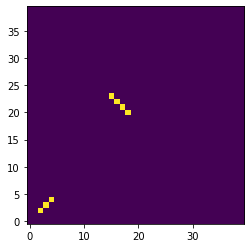

In [206]:
import numpy as np
import imageio.v2 as imageio
import math
import hough_transform as ht
import scipy.ndimage as ndimage
import scipy.sparse as sparse
import os
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import cm
import cv2
from matplotlib import scale as mscale
# col = np.array([1,2,3,5])
# row = np.array([1,2,3,5])
# data = np.array([1,1,1,1])
row = np.array([2,3,4,20,21,22,23])
col = np.array([2,3,4,18,17,16,15])
data = np.array([110,110,110,110,110,110,110])
arraysize = 40
hough_space_size_divisor = 200
threshold = 2   #fairly good, no effect changing from 1 through 10
image = sparse.coo_matrix((data, (row,col)),shape=(arraysize, arraysize), dtype=float).toarray()
plt.imshow(image, origin='lower')
# image = np.full(shape=(3,3),fill_value=(data), dtype=float)

threshold 2
hough_space [[40.  1.  1. ...  1.  1.  1.]
 [40. 47. 24. ... 16. 24. 47.]
 [40. 54. 47. ... 32. 47. 54.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
x 39
y 39


TypeError: 'int' object is not subscriptable

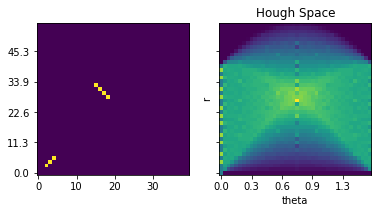

In [251]:
wafer_number = 55826023
theta_max = np.deg2rad(90) 
theta_min = np.deg2rad(-90)
r_min = 0.0
r_dim = arraysize 
theta_dim = arraysize

plt.close()
print('threshold',threshold)
# print('image',image)
# ax.plot(image, color='white')

img_shape = image.shape
x_max = img_shape[0]
y_max = img_shape[1]
r_max = math.hypot(x_max, y_max)
# # print('x_max',x_max)
# # print('y_max',y_max)
# # print('r_max',r_max)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image)

hough_space = np.zeros((r_dim,theta_dim), dtype='f')

for x in range(x_max):
    for y in range(y_max):
        # if image[x,y] == 0: continue
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = x * math.cos(theta) + y * math.sin(theta)
            ir = np.ceil(r_dim * ( 1.0 * r ) / r_max).astype(int)
            # if r != 0:
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1
            # print('r',r)
            # print('theta',theta)

#Create second plot

# ax1.plot(hough_space, color='white')#, markeredgecolor='blue', markerfacecolor='red',marker='o', linestyle='dashed', linewidth=1, markersize=1)
print('hough_space', hough_space)
ax2.imshow(hough_space, origin='lower')
ax2.set_title('Hough Space')
ax2.set_xlabel('theta')
ax2.set_ylabel('r')
ax2.set_yscale('linear')
ax2.set_xscale('linear')
ax2_xtick_locs = [i for i in range(0,theta_dim,np.ceil(theta_dim/5).astype(int))]
ax2_xtick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,np.ceil(theta_dim/5).astype(int))]
ax2.set_xticks(ax2_xtick_locs,ax2_xtick_lbls)
ax2_ytick_locs = [i for i in range(0,r_dim,np.ceil(r_dim/5).astype(int))]
ax2_ytick_lbls = [round( (1.0 * i * r_max ) / r_dim,1) for i in range(0,r_dim,np.ceil(r_dim/5).astype(int))]
ax2.set_yticks(ax2_ytick_locs,ax2_ytick_lbls)
# print('x tick_locs',xtick_locs)
# print('x tick_lbls',xtick_lbls)
# print('y tick_locs',ytick_locs)
# print('y tick_lbls',ytick_lbls)
# ax.plot(hough_space, color='white', markeredgecolor='blue', markerfacecolor='red',marker='o', linestyle='dashed', linewidth=2, markersize=12)


# print('x_center',x_center)
# print('y_center',y_center)
print('x',x)
print('y',y)
# plt.imshow(hough_space, origin='lower')
# plt.savefig('hough_space_i_j.png', bbox_inches = 'tight')
# plt.close()

line_index = 1
i = y[0]
j = x[0]

r = round( (1.0 * i * r_max ) / r_dim,1)
theta = round( (1.0 * j * theta_max) / theta_dim,1)

print('r', r)
print('theta radians', theta)
print('theta degrees', np.rad2deg(theta))

px = []
py = []
for i in range(0, np.int64(r), 1):
#    print('i',i)
   px.append(math.cos(theta) * i)
   py.append(math.sin(theta) * i)

print('px',px)
print('py',py)

ax1.figure.set_facecolor('white')
ax1.plot(px, py, linewidth=1, linestyle=(0,(1,2)), color='cyan')
ax1.set_title('Image with Hough')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1_xtick_locs = [i for i in range(0,theta_dim,np.ceil(theta_dim/5).astype(int))]
ax1_xtick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,np.ceil(theta_dim/5).astype(int))]
ax1.set_xticks(ax1_xtick_locs,ax1_xtick_lbls)
ax1_ytick_locs = [i for i in range(0,r_dim,np.ceil(r_dim/5).astype(int))]
ax1_ytick_lbls = [round( (1.0 * i * r_max ) / r_dim,1) for i in range(0,r_dim,np.ceil(r_dim/5).astype(int))]
ax1.set_yticks(ax1_ytick_locs,ax1_ytick_lbls)
# print('y tick_locs',ytick_locs)
# print('y tick_lbls',ytick_lbls)
# print('x tick_locs',xtick_locs)
# print('x tick_lbls',xtick_lbls)
# # plt.show()
# # plt.close()

theta_min -1.5707963267948966
theta_max 1.5707963267948966
image_width 40
image_height 40
diag_len 57
num_thetas 180
y_idxs.size 7
len(x_idxs) 7
accumulator_width 180
accumulator_height 114
ax2_xtick_locs [0.0, 30.0, 60.0, 90.0, 120.0, 150.0, 180.0]
ax2_xtick_lbls [-1.6, -1.0, -0.5, 0.0, 0.5, 1.0, 1.6]
np.nonzero(accumulator) (array([34, 34, 35, ..., 84, 84, 84], dtype=int64), array([  0,   1,   0, ..., 160, 161, 162], dtype=int64))
accumulator.size 20520
accumulator.shape[1] 180
idx 10307
rho=0.50, theta=-43
px [0.0, 0.7313537016191705, 1.462707403238341, 2.1940611048575116, 2.925414806476682]
py [-0.0, -0.6819983600624985, -1.363996720124997, -2.0459950801874953, -2.727993440249994]


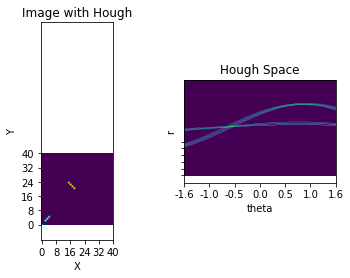

In [280]:
r_dim = arraysize 
theta_dim = arraysize
theta_max = np.deg2rad(90) 
theta_min = np.deg2rad(-90)
print('theta_min',theta_min)
print('theta_max',theta_max)
thetas = np.deg2rad(np.arange(-90.0, 90.0))
image_width, image_height = image.shape
print('image_width',image_width)
print('image_height',image_height)
diag_len = np.ceil(np.sqrt(image_width * image_width + image_height * image_height)).astype(int)   # max_dist
print('diag_len',diag_len)
rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
# print('rhos',rhos)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image)

# Cache some resuable values
cos_t = np.cos(thetas)
sin_t = np.sin(thetas)
num_thetas = len(thetas)
print('num_thetas',num_thetas)

# Hough accumulator array of theta vs rho
accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
y_idxs, x_idxs = np.nonzero(image)  # (row, col) indexes to edges
print('y_idxs.size',y_idxs.size)
print('len(x_idxs)',len(x_idxs))

# Vote in the hough accumulator
for i in range(len(x_idxs)):
  x = x_idxs[i]
  y = y_idxs[i]

  for t_idx in range(num_thetas):
    # Calculate rho. diag_len is added for a positive index
    rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
    accumulator[rho, t_idx] += 1

accumulator_height, accumulator_width = accumulator.shape
print('accumulator_width', accumulator_width)
print('accumulator_height', accumulator_height)
ax2.imshow(accumulator, origin='lower')
ax2.set_title('Hough Space')
ax2.set_xlabel('theta')
ax2.set_ylabel('r')
ax2.set_yscale('linear')
ax2.set_xscale('linear')
x_interval = 3
# ax2_xtick_interval = np.ceil(accumulator_width/5).astype(int)
# ax2_ytick_interval = np.ceil(accumulator_height/5).astype(int)
ax2_xtick_locs = [(i * (accumulator_width/(x_interval * 2))) for i in range(0,np.ceil(accumulator_width/(accumulator_width/(x_interval * 2))).astype(int)+1,1)]
print('ax2_xtick_locs',ax2_xtick_locs)
ax2_xtick_lbls = [round( (theta_max * (i/x_interval)),1) for i in range((-1 * x_interval),x_interval+1,1)]
print('ax2_xtick_lbls',ax2_xtick_lbls)
ax2.set_xticks(ax2_xtick_locs,ax2_xtick_lbls)
ax2_ytick_locs = [i for i in range(0,-5,5)]
ax2_ytick_lbls = [round( (1.0 * (i/5) * r_max ),1) for i in range(0,-5,5)]
ax2.set_yticks(ax2_ytick_locs,ax2_ytick_lbls)

print('np.nonzero(accumulator)',np.nonzero(accumulator))
print('accumulator.size',accumulator.size)
print('accumulator.shape[1]',accumulator.shape[1])

# Easiest peak finding based on max votes
idx = np.argmax(accumulator)
print('idx',idx)
rho = rhos[(idx / accumulator.shape[1]).astype(int)]
theta = thetas[idx % accumulator.shape[1]]
print ('rho={0:.2f}, theta={1:.0f}'.format(rho, np.rad2deg(theta)))

px = []
py = []
for i in range(0, np.int64(rho*10).astype(int), 1):
#    print('i',i)
   px.append(math.cos(theta) * i)
   py.append(math.sin(theta) * i)

print('px',px)
print('py',py)

ax1.figure.set_facecolor('white')
ax1.plot(px, py, linewidth=1, linestyle=(0,(1,2)), color='cyan')
ax1.set_title('Image with Hough')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1_xtick_interval = np.ceil(image_width/5).astype(int)
ax1_ytick_interval = np.ceil(image_height/5).astype(int)
ax1_xtick_locs = [i for i in range(0,image_width + ax1_xtick_interval,ax1_xtick_interval)]
ax1_xtick_lbls = [round( (i),1) for i in range(0,image_width + ax1_xtick_interval,ax1_xtick_interval)]
ax1.set_xticks(ax1_xtick_locs,ax1_xtick_lbls)
ax1_ytick_locs = [i for i in range(0,image_height + ax1_ytick_interval,ax1_ytick_interval)]
ax1_ytick_lbls = [round( (i),1) for i in range(0,image_height + ax1_ytick_interval,ax1_ytick_interval)]
ax1.set_yticks(ax1_ytick_locs,ax1_ytick_lbls)

In [136]:
# data = np.array([1,2,3,4,5,6,7,8,9])

r_dim = 3
theta_dim = 3

image = sparse.coo_matrix((data, (row,col)),shape=(3, 3), dtype=float).toarray()
print('image',image)
hough_space = np.zeros((r_dim,theta_dim), dtype='f')

for x in range(r_dim):
    for y in range(r_dim):
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = x * math.cos(theta) + y * math.sin(theta)
            ir = np.ceil(r_dim * ( 1.0 * r ) / r_max).astype(int)
            # print('ir',ir)
            # print('itheta',itheta)
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1

print('hough_space',hough_space)
ax = plt.axes()
ax.imshow(hough_space, origin='lower') #,cmap=plt.cm.Paired
data_max = ndimage.maximum_filter(hough_space, 2)
print('data_max',data_max)
plt.close()

image [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
hough_space [[3. 1. 4.]
 [6. 8. 5.]
 [0. 0. 0.]]
data_max [[3. 3. 4.]
 [6. 8. 8.]
 [6. 8. 8.]]


In [135]:
image_width = 3
image_height = 3
radius = 1
row = np.array([0,0,0,1,1,1,2,2,2])
col = np.array([0,1,2,0,1,2,0,1,2])
data = np.array([1,0,0,0,1,0,0,0,1])

image = sparse.coo_matrix((data, (row,col)),shape=(image_width, image_height), dtype=float).toarray()
result = np.zeros((image_width,image_height))

print('image',image)

for x in range(0,image_width-1,1):

    x0 = max(0, x - radius)
    x1 = min(image_width - 1, x + radius)

    for y in range(0,image_height-1,1):
    
        print('x',x,'y',y)
        y0 = max(0, y - radius)
        y1 = min(image_height - 1, y + radius)
        max_pixel = image[x, y]

        print('x0',x0,'x1',x1,'y0',y0,'y1',y1)
        print('max_pixel y loop',max_pixel)

        for u in range(x0,x1,1):

            for v in range(y0,y1,1):

                print('u',u,'v',v)
                print('image[u, v]',image[u, v])

                if image[u, v] > max_pixel:

                    print('max_pixel result',max_pixel)
                    max_pixel = image[u, v]

        print('max_pixel final',max_pixel)
        result[x, y] = max_pixel
        print('')

print('result',result)

data_max = ndimage.maximum_filter(image, 2)
print('data_max',data_max)

image [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
x 0 y 0
x0 0 x1 1 y0 0 y1 1
max_pixel y loop 1.0
u 0 v 0
image[u, v] 1.0
max_pixel final 1.0

x 0 y 1
x0 0 x1 1 y0 0 y1 2
max_pixel y loop 0.0
u 0 v 0
image[u, v] 1.0
max_pixel result 0.0
u 0 v 1
image[u, v] 0.0
max_pixel final 1.0

x 1 y 0
x0 0 x1 2 y0 0 y1 1
max_pixel y loop 0.0
u 0 v 0
image[u, v] 1.0
max_pixel result 0.0
u 1 v 0
image[u, v] 0.0
max_pixel final 1.0

x 1 y 1
x0 0 x1 2 y0 0 y1 2
max_pixel y loop 1.0
u 0 v 0
image[u, v] 1.0
u 0 v 1
image[u, v] 0.0
u 1 v 0
image[u, v] 0.0
u 1 v 1
image[u, v] 1.0
max_pixel final 1.0

result [[1. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]
data_max [[1. 1. 0.]
 [1. 1. 1.]
 [0. 1. 1.]]
